In [3]:
from functions import generate_random_terrain
from utils import visualize_3d_terrain, visualize_terrain

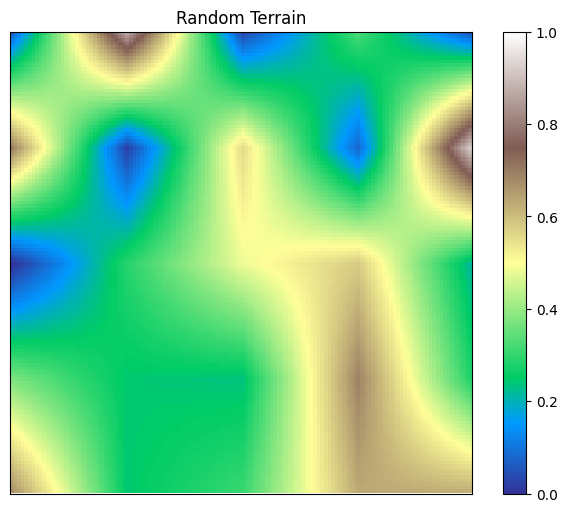

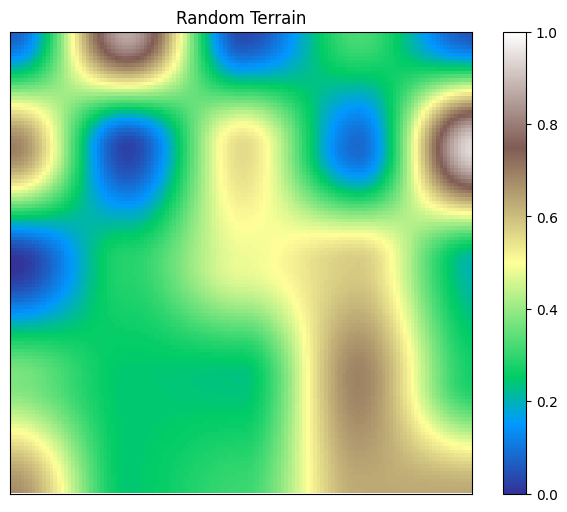

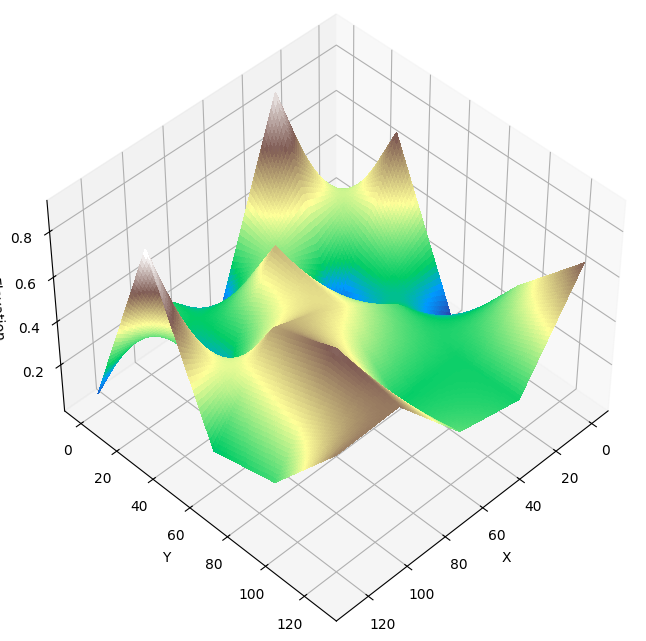

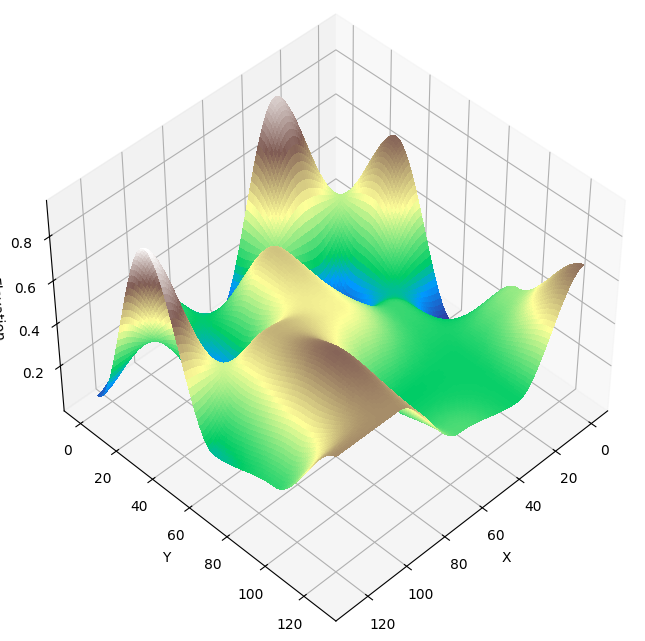

In [7]:

# Generate a 256x256 terrain heightmap with a scale factor of 8 using bilinear interpolation
terrain_bl, terrain_bq = generate_random_terrain(128, 32)

visualize_terrain(terrain_bl)
visualize_terrain(terrain_bq)

visualize_3d_terrain(terrain_bl, cmap='terrain', elev=45, azim=45)
visualize_3d_terrain(terrain_bq, cmap='terrain', elev=45, azim=45)

In [5]:
import numpy as np

def generate_gradient_noise(size, scale, interpolation='bilinear'):
    """
    Generate a random terrain heightmap using gradient noise (Perlin noise).

    Args:
        size (int): Size of the terrain heightmap.
        scale (int): Scale factor for the random lattice.
        interpolation (str): Type of interpolation ('bilinear' or 'bicubic').

    Returns:
        numpy.ndarray: Terrain heightmap.
    """
    bl_terrain = np.zeros((size, size))
    bc_terrain = np.zeros((size, size))
    coarse_size = size // scale
    
    # Generate random gradients
    gradients = np.random.rand(coarse_size + 1, coarse_size + 1, 2) * 2 - 1
    
    # Calculate heights from gradients
    for i in range(coarse_size):
        for j in range(coarse_size):
            i0 = i * scale
            i1 = (i + 1) * scale
            j0 = j * scale
            j1 = (j + 1) * scale
            
            for x in range(i0, i1):
                for y in range(j0, j1):
                    x_ratio = (x - i0) / scale
                    y_ratio = (y - j0) / scale
                    
                    g00 = gradients[i, j]
                    g10 = gradients[i + 1, j]
                    g01 = gradients[i, j + 1]
                    g11 = gradients[i + 1, j + 1]
                    
                    h00 = np.dot(g00, [x_ratio, y_ratio])
                    h10 = np.dot(g10, [x_ratio - 1, y_ratio])
                    h01 = np.dot(g01, [x_ratio, y_ratio - 1])
                    h11 = np.dot(g11, [x_ratio - 1, y_ratio - 1])
                    bl_terrain[x, y] = bilinear_interpolation(x_ratio, y_ratio, h00, h10, h01, h11)
                    bc_terrain[x, y] = bicubic_interpolation(x_ratio, y_ratio, h00, h10, h01, h11)
    
    return bl_terrain, bc_terrain

def bilinear_interpolation(x, y, g00, g10, g01, g11):
    """
    Bilinear interpolation between four points.
    """
    x1 = g00 * (1 - x) + g10 * x
    x2 = g01 * (1 - x) + g11 * x
    return x1 * (1 - y) + x2 * y

def bicubic_interpolation(x, y, g00, g10, g01, g11):
    """
    Bicubic interpolation between four points using the S-curve function s(x) = -2x^3 + 3x^2.
    """
    def s(x):
        return -2 * x**3 + 3 * x**2

    x1 = g00 * (1 - s(x)) + g10 * s(x)
    x2 = g01 * (1 - s(x)) + g11 * s(x)
    return x1 * (1 - s(y)) + x2 * s(y)

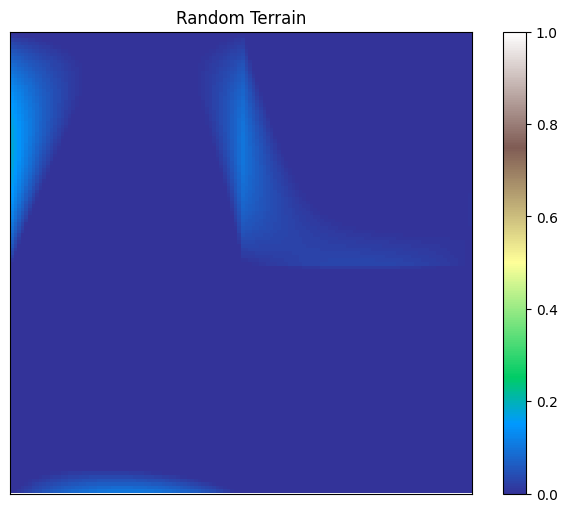

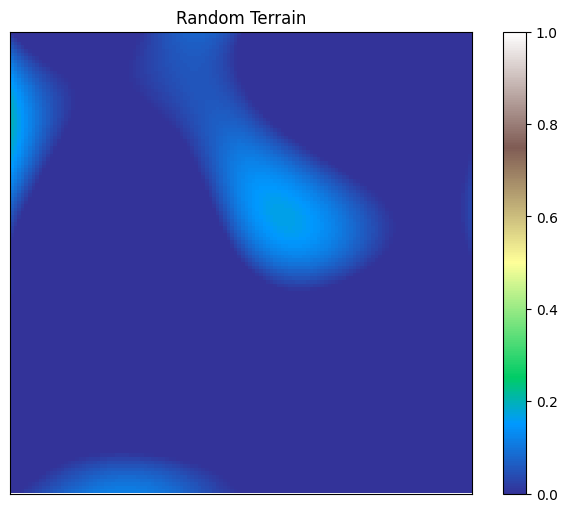

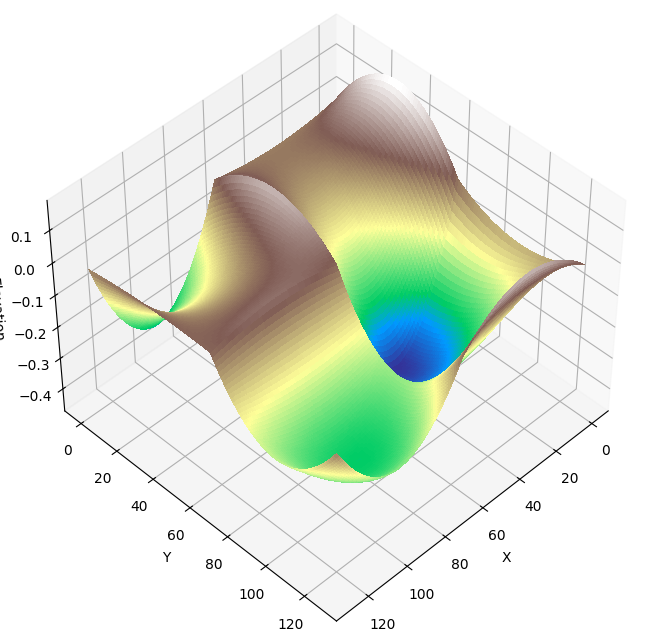

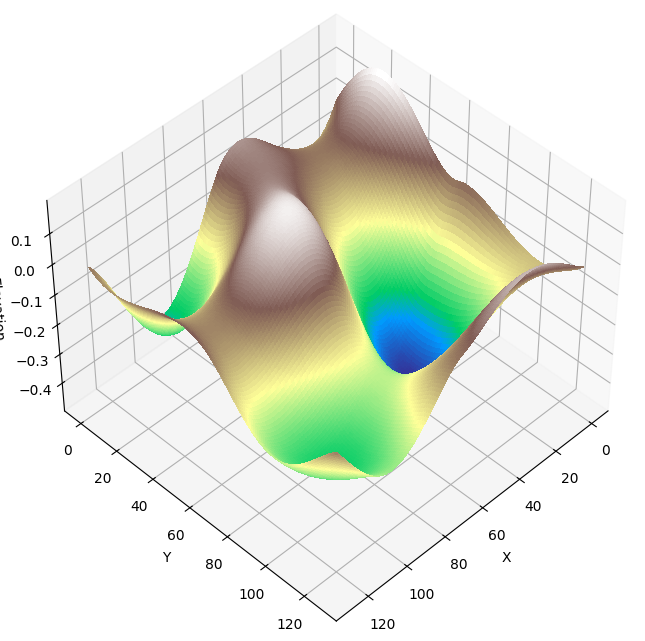

In [12]:

# Generate a 256x256 terrain heightmap with a scale factor of 8 using bilinear interpolation
terrain_bl, terrain_bq = generate_gradient_noise(128, 64)

visualize_terrain(terrain_bl)
visualize_terrain(terrain_bq)

visualize_3d_terrain(terrain_bl, cmap='terrain', elev=45, azim=45)
visualize_3d_terrain(terrain_bq, cmap='terrain', elev=45, azim=45)

In [ ]:
|